In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import scipy
from scipy.cluster import hierarchy as hc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from feature_engineering import date_feature_extracter, numericalise

## DataLoading

In [2]:
df = pd.read_csv("data/Train.csv", low_memory=False, parse_dates=["saledate"])
df.head(2).T

,0,1
SalesID,1139246,1139248
SalePrice,66000,57000
MachineID,999089,117657
ModelID,3157,77
datasource,121,121
auctioneerID,3,3
YearMade,2004,1996
MachineHoursCurrentMeter,68,4640
UsageBand,Low,Low
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00


## Modelling on only numerical features

In [3]:
df_numerical = df.select_dtypes(exclude='O').copy()

In [4]:
df_numerical.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
saledate                         0
dtype: int64

In [5]:
df_numerical.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [6]:
# filling nas with -100 as none of the values are negative
# note that missingness is a feature

for col in ["auctioneerID","MachineHoursCurrentMeter"]:
    df_numerical[col] = df_numerical[col].fillna(-100)

In [7]:
df_numerical.isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
saledate                    0
dtype: int64

In [8]:
df_numerical.dtypes

SalesID                              int64
SalePrice                            int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
saledate                    datetime64[ns]
dtype: object

## Features from date

In [9]:
date_feature_extracter(df_numerical, 'saledate')
df_numerical.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
saleYear,2006,2004,2004,2011,2009
saleMonth,11,3,2,5,7


## DataSplitting

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
feature = df_numerical.drop(["SalePrice"], axis=1).copy().values
target = np.log(df_numerical.SalePrice.copy().values)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=1)

## RandomForest on just the numerical columns.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [15]:
model = RandomForestRegressor(n_estimators=50).fit(X_train, y_train)

In [16]:
predictions = model.predict(X_test)

## RMSE is much lower than with the linear model

In [17]:
np.sqrt(mean_squared_error(y_test, predictions))

0.2369666410347035

### The R2 score is excellent - which means that more than 87% of the variation is explained by the model and this is just based on the numerical cols

In [18]:
model.score(X_test, y_test)

0.8838227396741162

## RandomForestRegression Baseline on full data

In [19]:
# copying df to create non-destructive edits

df_rf_full = df.copy()

# fixinf numerical nas 
# filling nas with -100 as none of the values are negative
# note that missingness is a feature

for col in ["auctioneerID","MachineHoursCurrentMeter"]:
    df_rf_full[col] = df_rf_full[col].fillna(-100)

In [20]:
df_numericalised = numericalise(df_rf_full)

In [21]:
# extracting date from the full file
date_feature_extracter(df_numericalised, colnames='saledate')

# checking for the transformation
df_numericalised.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


Splitting into train test split

In [22]:
feature = df_numericalised.drop(["SalePrice"], 
                                axis=1).copy().values

target  = np.log(df_numericalised.SalePrice.copy().values)

# train test split
X_train, X_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    random_state=1)

In [23]:
%time model_all_df = RandomForestRegressor(oob_score=True,n_estimators=50).fit(X_train,y_train)

Wall time: 5min 28s


In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300843, 64), (300843,), (100282, 64), (100282,))

In [25]:
predictions = model_all_df.predict(X_test)
#model.score(X_train, y_train)

In [26]:
np.sqrt(mean_squared_error(y_test, predictions))

0.2080785204318526

In [27]:
model_all_df.score(X_train, y_train)

0.9868710202170053

While the RMSE has bumped a little, The R2 score is now 98% on the test data which is brilliant more than 98% of the variation is explained by the model and this is just based on the numerical cols

## Evaluating the performance

Beginning with feature importance

In [28]:
def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()
    
def feat_importance(model, df):
    """Returns dataframe with sorted feature importance and cumsum"""
    feat_imp_df = pd.DataFrame({'cols':df.columns, 
                            'importance':model.feature_importances_}
                            ).sort_values('importance', ascending=False).reset_index(drop=True)
    feat_imp_df["Cum Freq"] = feat_imp_df.importance.cumsum()
    return feat_imp_df
 
def plot_fi(feat_importance_df, figsize=(12,24)):
    return feat_importance_df.plot('cols', 
                                   'importance', 
                                   'barh', 
                                   figsize=figsize, 
                                   legend=False)

feat_imp_df = feat_importance(model_all_df, 
                              df_numericalised.drop('SalePrice', axis=1))

feat_imp_df

,cols,importance,Cum Freq
0,Coupler_System,0.202798,0.202798
1,YearMade,0.172297,0.375094
2,fiProductClassDesc,0.105225,0.480319
3,ProductSize,0.105014,0.585333
4,ModelID,0.091887,0.677220
...,...,...,...
59,Turbocharged,0.000071,0.999942
60,Grouser_Tracks,0.000038,0.999981
61,Hydraulics_Flow,0.000019,1.000000
62,saleIs_year_end,0.000000,1.000000


<Figure size 720x576 with 0 Axes>

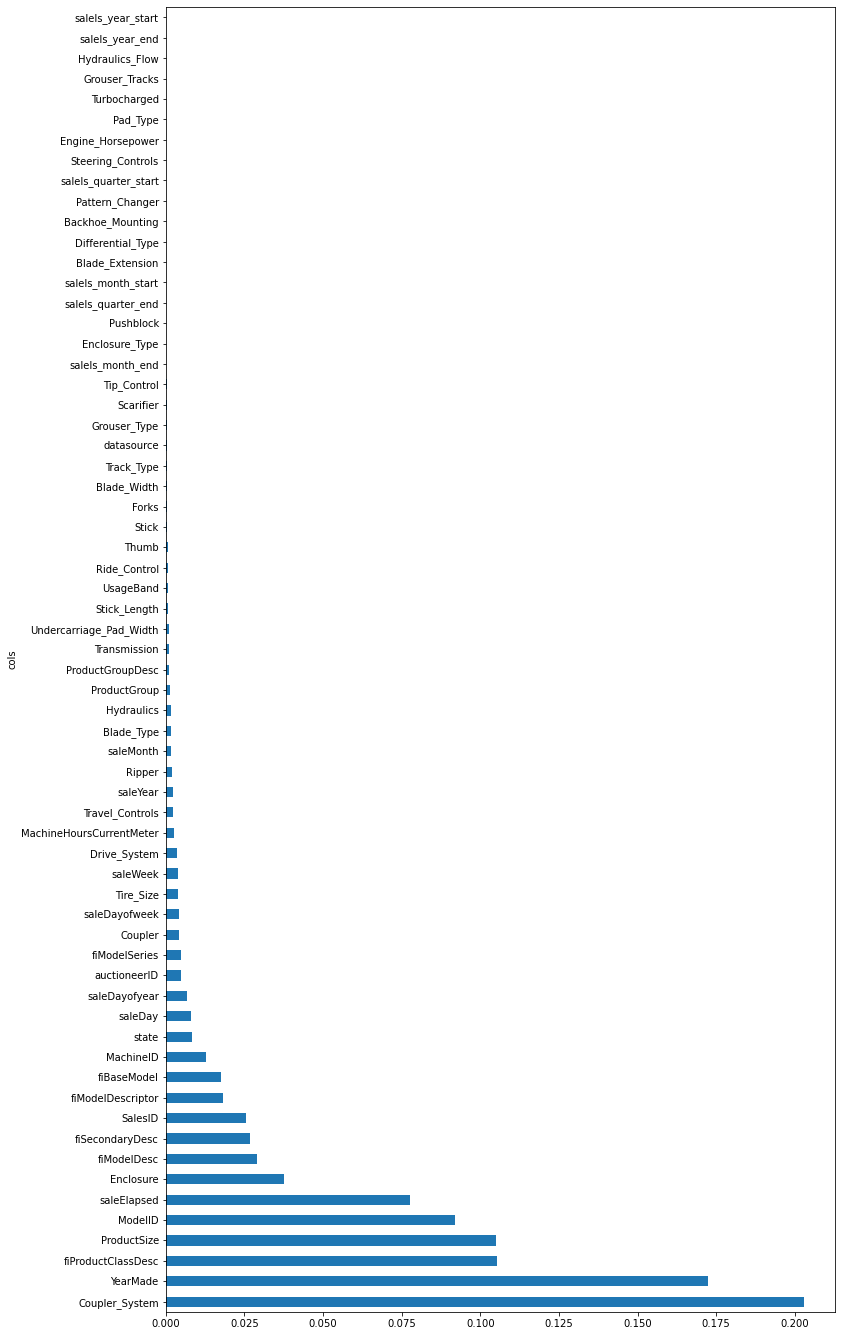

In [29]:
plt.figure(figsize=(10,8))
plot_fi(feat_imp_df);

Top 12 columns account for over 92% of importance as discovered by the model

Modelling on those features only

In [30]:
top_92_features = feat_imp_df.head(12).cols

feature = df_numericalised[top_92_features].copy().values

target  = np.log(df_numericalised.SalePrice.copy().values)

# train test split
X_train, X_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    random_state=1)

In [31]:
%time top_feats_model = RandomForestRegressor(oob_score=True, n_estimators=50).fit(X_train, y_train)

Wall time: 1min 44s


In [32]:
predictions = top_feats_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, predictions))

0.21616535264703218

Cluster Analysis

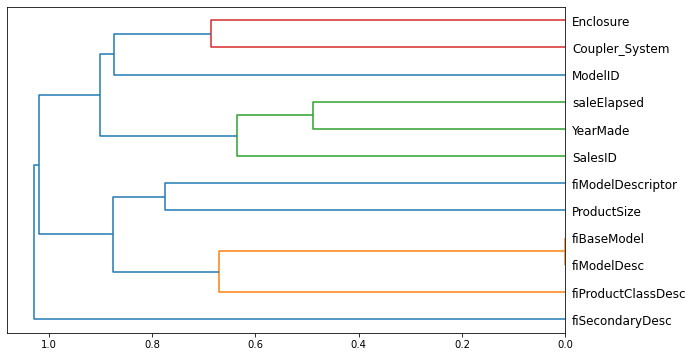

In [33]:
cluster_columns(df_numericalised[top_92_features])

RMSE has slightly increased, but we have a model with considerably lesser features

Exploring the Model

The standard deviation of the predictions over all the trees, for each auction:

In [34]:
top_feat_imp_df = feat_importance(top_feats_model, 
                              df_numericalised[top_92_features])
top_feat_imp_df

,cols,importance,Cum Freq
0,Coupler_System,0.202441,0.202441
1,YearMade,0.175993,0.378434
2,fiProductClassDesc,0.114719,0.493153
3,ProductSize,0.109068,0.602221
4,saleElapsed,0.103883,0.706103
5,ModelID,0.098096,0.804199
6,SalesID,0.049642,0.853842
7,Enclosure,0.042314,0.896156
8,fiModelDesc,0.033436,0.929592
9,fiSecondaryDesc,0.029863,0.959455


<AxesSubplot:ylabel='cols'>

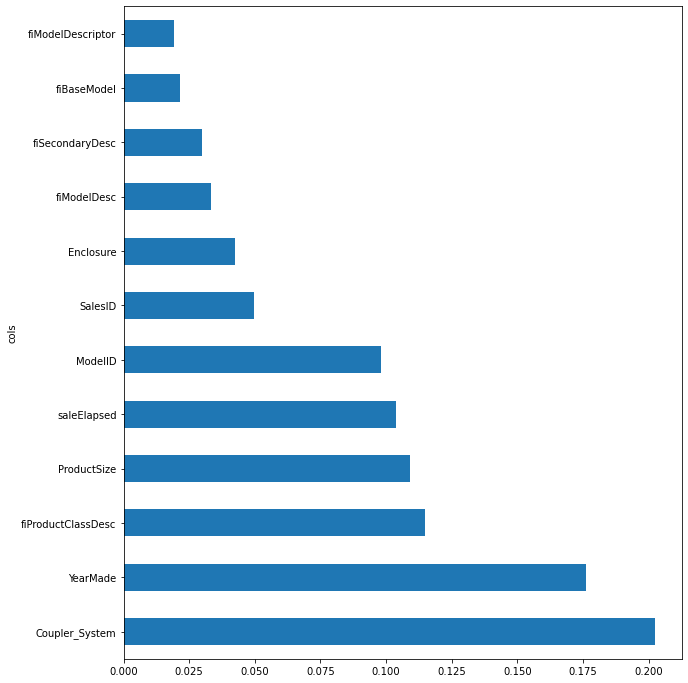

In [35]:
plot_fi(top_feat_imp_df, figsize=(10,12))

Checking standard deviation of the estimator trees

In [36]:
preds = np.stack([t.predict(X_test) for t in top_feats_model.estimators_])
preds.shape

(50, 100282)

In [37]:
preds_std = preds.std(0)

In [38]:
# there is good amount of variability in the trees as expected in a RF model
preds_std[:5]

array([0.13277592, 0.21953357, 0.08506516, 0.24163049, 0.29098811])

Plot per tree in the estimator

In [39]:
def rmse(predictions, y_test):
    return np.sqrt(mean_squared_error(y_test, predictions))

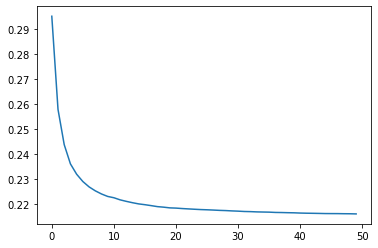

In [40]:
plt.plot([rmse(preds[:i+1].mean(0), y_test) 
          for i in range(50)]);

RMSE on Out-of-Bag data is also good, hence there is no overfitting

In [41]:
rmse(top_feats_model.oob_prediction_, y_train)

0.22027572557814684

Partial Dependence

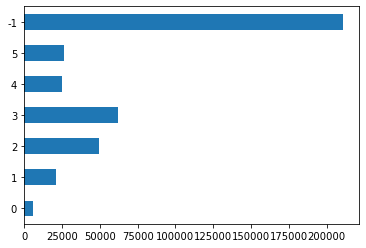

In [42]:
pd_prod = df_numericalised[top_92_features]['ProductSize'].value_counts(sort=False).plot.barh()

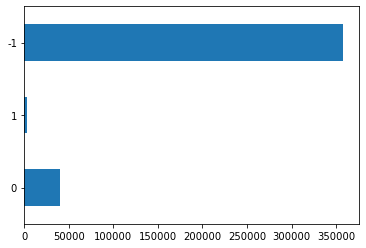

In [43]:
pd_prod = df_numericalised[top_92_features]['Coupler_System'].value_counts(sort=False).plot.barh()

Partial Dependence Analysis

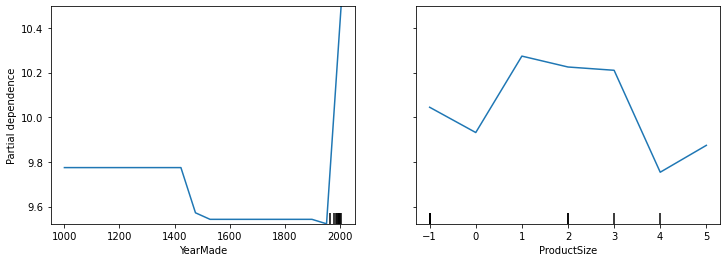

In [48]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(top_feats_model, 
                        df_numericalised[top_92_features], 
                        ['YearMade','ProductSize'],
                        grid_resolution=20, 
                        ax=ax);

In [50]:
warnings.simplefilter('ignore', FutureWarning)

In [51]:
from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [52]:
row = df_numericalised[top_92_features].iloc[:5]

In [53]:
prediction,bias,contributions = treeinterpreter.predict(top_feats_model,
                                                        row.values)

In [54]:
prediction[0], bias[0], contributions[0].sum()

(array([11.0740919]), 10.102499402163211, 0.9715924933745513)

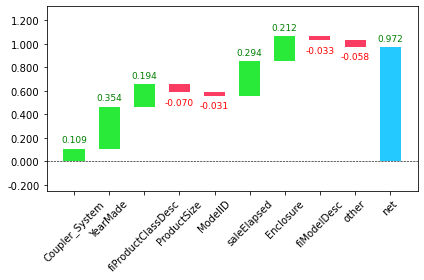

In [55]:
waterfall(df_numericalised[top_92_features].columns, 
          contributions[0], 
          threshold=0.08, 
          rotation_value=45,
          formatting='{:,.3f}');